# Development of Predictive Data Mining Model for Clinical Data

## Introduction

In the evolving landscape of healthcare, timely and accurate diagnosis remains a critical component in improving patient outcomes and reducing healthcare costs. With the rapid accumulation of patient data, there is a growing opportunity to leverage data mining and machine learning techniques to support clinical decision-making.

This project is titled **"Development of Predictive Data Mining Model for Clinical Data"**, and its primary aim is to develop a predictive model that analyzes clinical data to forecast the likelihood of disease occurrence — with a specific focus on diabetes prediction. By combining data mining methods with predictive analytics, the project seeks to uncover patterns in patient health profiles and provide interpretable, actionable insights that can assist healthcare professionals.

## Project Objectives

1. **To acquire and preprocess clinical data relevant to disease prediction.**  
2. **To identify and select suitable data mining algorithms for clinical prediction tasks.**  
3. **To train and validate the predictive model using selected clinical datasets.**  
4. **To evaluate the performance of the model using appropriate performance metrics.**  
5. **To implement a simple prototype that demonstrates the application of the predictive model in real-time clinical scenarios.**

## Dataset Overview

For this project, we utilize the **Pima Indians Diabetes Dataset**, a well-known clinical dataset containing patient health records and diabetes test results. The dataset includes 768 instances and the following clinical features:

- **Pregnancies**
- **Glucose**
- **BloodPressure**
- **SkinThickness**
- **Insulin**
- **BMI (Body Mass Index)**
- **DiabetesPedigreeFunction**
- **Age**

The target variable is:
- **Outcome**: 0 for non-diabetic, 1 for diabetic.

This notebook documents the complete data mining process — from data preprocessing and exploratory analysis to predictive modeling, evaluation, and deployment via a mini prototype. Each step is clearly explained and aligned with the project's clinical objective: to support early diagnosis of diabetes through data-driven modeling.

----

##  Environment Setup and Library Imports

Before diving into the data mining process, we begin by importing all necessary libraries and configuring the environment.

- **General Utilities:** We use `pandas` for data manipulation and `os` for interacting with file systems.
- **Visualization Tools:** `matplotlib` and `seaborn` are used for creating informative charts and plots.
- **Unsupervised Learning Tools:** We import `KMeans` for clustering and `PCA` for dimensionality reduction.
- **Association Rule Mining:** The `mlxtend` library provides the `apriori` and `association_rules` functions for discovering hidden if-then patterns in data.
- **Data Preprocessing & Evaluation:** Includes tools for data splitting, standardization, and common performance metrics (accuracy, recall, F1 score, AUC, etc.).
- **Machine Learning Models:** We include traditional classifiers such as:
  - `LogisticRegression` for baseline interpretability,
  - `DecisionTreeClassifier` for rule-based modeling,
  - `RandomForestClassifier`, `GradientBoostingClassifier`, and `XGBClassifier` for ensemble-based performance.
- **Model Deployment:** `joblib` is used to save the trained model for reuse in a deployment prototype.
- **Web Access:** `kagglehub` is included for remote dataset access or automated downloads.
- **Warning Management:** Lastly, we suppress future and deprecation warnings to ensure clean, readable outputs in the notebook.

In [70]:
# General Utilities 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6
import seaborn as sns

# Unsupervised Laearning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules

# Data Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model deployment
import joblib

# Web Scraping
import os
import kagglehub

# Suppress future warnings to keep notebook output clean
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Data Acquisition

In this section, we load the **Pima Indians Diabetes Dataset**, which contains clinical data from 768 female patients of at least 21 years of age. Each record describes medical attributes that are potentially predictive of diabetes.

- If the dataset already exists locally (in `data/diabetes.csv`), it is read directly.
- Otherwise, it is downloaded via the `kagglehub` library and saved for reuse.

After loading, we display:
- The shape of the dataset: **768 rows and 9 columns**
- The first five entries to preview the features and target variable.

### Dataset Columns:
- **Pregnancies**: Number of times pregnant  
- **Glucose**: Plasma glucose concentration  
- **BloodPressure**: Diastolic blood pressure (mm Hg)  
- **SkinThickness**: Triceps skinfold thickness (mm)  
- **Insulin**: 2-Hour serum insulin (mu U/ml)  
- **BMI**: Body mass index (weight in kg/(height in m)^2)  
- **DiabetesPedigreeFunction**: A function which scores likelihood of diabetes based on family history  
- **Age**: Age in years  
- **Outcome**: Target variable (0 = non-diabetic, 1 = diabetic)

In [38]:
filename = "data/diabetes.csv"
if os.path.exists(filename):
        print("Reading from saved file...")
        df = pd.read_csv(filename)
else:
    path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
        
    print("Path to dataset files:", path)
    df = pd.read_csv(f"{path}/diabetes.csv")

print(df.shape)
df.head()

Reading from saved file...
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Initial Data Inspection and Correlation Analysis

To begin the data mining process, we first inspect the structure and quality of the dataset and then analyze relationships among features using a correlation matrix.

### Dataset Information
Using `df.info()`, we confirm:
- There are **768 complete records**, with **no missing values** across the 9 columns.
- Data types are appropriate: 7 integer columns and 2 floating-point columns.
- The `Outcome` column is our target variable.

### Correlation Matrix
Next, we compute the **correlation matrix** to assess how numerical features relate to each other. This helps identify any potential multicollinearity (i.e., when two or more features are highly linearly correlated).

The matrix is visualized with a `seaborn` heatmap:
- **Blue to red color range** (coolwarm colormap) indicates strength of correlation.
- **Diagonal values** are always 1 (each feature's correlation with itself).
- **No values near ±1 among independent features**, confirming **no strong multicollinearity** is present.  
  This means all features can be retained for modeling without concerns of redundancy or linear dependency.

This step ensures the dataset is structurally sound and ready for preprocessing and modeling.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


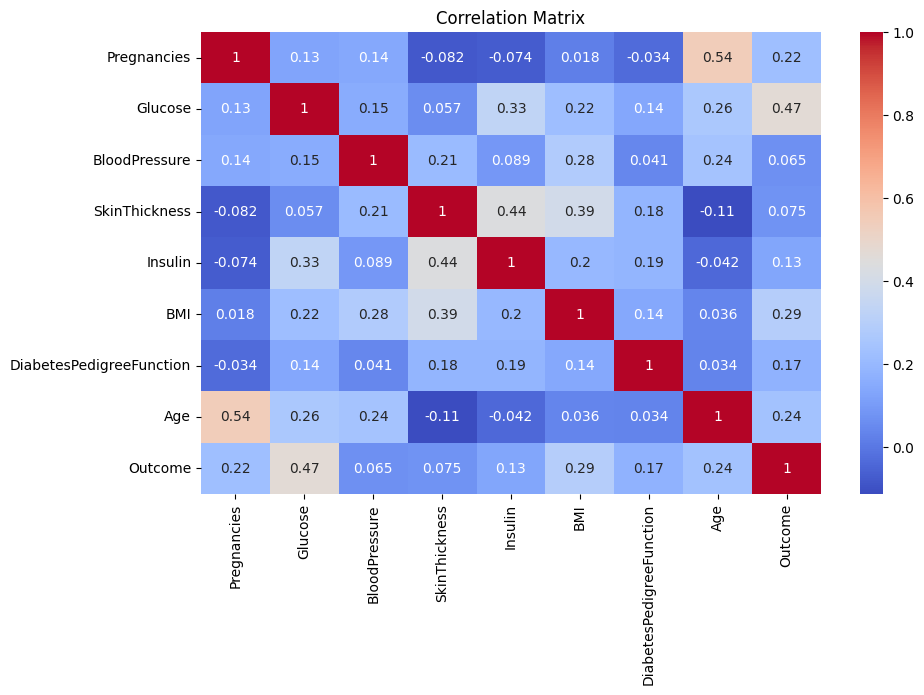

In [40]:
print(df.info())

correlation_matrix = df.corr()

plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Feature Selection and Clinical Justification

After confirming the data structure and feature relationships, we proceed to remove two columns from the dataset: **`SkinThickness`** and **`Insulin`**. The decision is based on both **clinical relevance** and **data quality**:

### 1. Dropping `SkinThickness`
- Although statistically complete, this feature is not commonly measured or known in routine clinical practice.
- Since the goal of this project is to build a practical and **clinically accessible predictive model**, we exclude this feature to ensure the inputs reflect **easily obtainable patient metrics**.

### 2. Dropping `Insulin`
- The `Insulin` feature has no null values, but the **majority of its entries are zero**, suggesting unreliable or missing measurement.
- Handling this would require heavy imputation or transformation, which could **distort the integrity of the data**.
- Furthermore, **insulin testing is not routinely available** in many basic healthcare settings, so excluding it does not compromise the practical applicability of the model.

### Result
By dropping these two features:
- We retain **clinically meaningful and accessible** inputs,
- Avoid injecting noise or assumptions into the dataset,
- Keep the model simple, interpretable, and widely usable.

The resulting dataset now contains **7 columns**, with 6 predictive features and 1 target variable (`Outcome`).

In [41]:
df.drop(columns=['SkinThickness', 'Insulin'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [42]:
df.to_csv("data/cleaned_diabetes_data.csv", index=False)

## EXPLORATORY DATA ANALYSIS

In [8]:
def add_percentage_labels(ax, total):
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

## Feature and Target Separation

Before beginning exploratory analysis and modeling, we separate the dataset into:

- **`features`**: All input variables that may help in predicting diabetes.  
- **`target`**: The `Outcome` column, which indicates whether a patient is diabetic (`1`) or not (`0`).

This distinction allows for:
- Focused **exploratory analysis** on feature distributions,
- Model training using only relevant predictors,
- Evaluation of how input features relate to the clinical outcome.

This step also sets up the data structure needed for modeling and further analysis.

In [9]:
target = df['Outcome']
features = df.drop(columns='Outcome', axis=1)

## Target Variable Distribution: Class Imbalance Check

Understanding the distribution of the target variable is critical, especially in clinical prediction tasks where **imbalanced datasets** can bias model performance.

We analyze the frequency of the target classes:
- `0`: Non-diabetic
- `1`: Diabetic

### Class Counts and Percentages:
- **0 (Non-diabetic): 65.1%**
- **1 (Diabetic): 34.9%**

This shows a **moderate class imbalance**, with non-diabetic cases nearly twice as frequent as diabetic ones. This imbalance can affect the performance of certain machine learning algorithms — especially those that optimize for overall accuracy. Therefore:
- It’s important to evaluate models using metrics like **precision**, **recall**, and **F1-score**, not just accuracy.
- We may also consider techniques like **stratified sampling**, **balanced class weights**, or **oversampling (e.g., SMOTE)** depending on model behavior.

### Visualization
The bar chart visually confirms this distribution, offering a quick glance at the imbalance and reinforcing the need for careful evaluation during modeling.


0: 65.1%
1: 34.9%


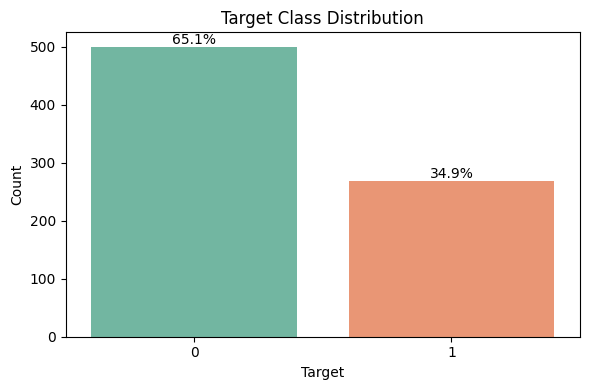

In [10]:
outcome_count = df['Outcome'].value_counts()
total = outcome_count.sum()
percentages = (outcome_count / total * 100).round(1)
    
# Display table of percentages
for response, pct in percentages.items():
    print(f"{response}: {pct}%")

plt.figure(figsize=(6,4))
ax = sns.barplot(x=outcome_count.index, y=outcome_count.values, palette='Set2')
add_percentage_labels(ax, outcome_count.sum())
plt.title('Target Class Distribution')
plt.ylabel('Count')
plt.xlabel('Target')
plt.tight_layout()
plt.show()

## Feature Distribution and Skewness Analysis

To better understand the nature of each input feature, we visualize their distributions and compute **skewness**, which quantifies how symmetric or asymmetric the data is around the mean.

- A **skewness near 0** indicates a roughly symmetric distribution.
- A **positive skew** means a longer tail on the right (right-skewed).
- A **negative skew** means a longer tail on the left (left-skewed).

Each feature is visualized using a histogram with a KDE (kernel density estimate) line to show the shape of the distribution.

### Skewness Results:
| Feature                   | Skewness | Interpretation         |
|---------------------------|----------|-------------------------|
| **Pregnancies**           | 0.90     | Moderately right-skewed |
| **Glucose**               | 0.17     | Approximately symmetric |
| **BloodPressure**         | -1.84    | Strongly left-skewed    |
| **BMI**                   | -0.43    | Mildly left-skewed      |
| **DiabetesPedigreeFunction** | 1.92 | Highly right-skewed     |
| **Age**                   | 1.13     | Moderately right-skewed |

### Implications:
- **Symmetric or near-symmetric features** (like `Glucose` and `BMI`) are fine as-is.
- The presence of **non-normality is expected in clinical data**, and many models (like tree-based ones) can handle this naturally without transformation.

These insights help inform both preprocessing strategies and feature engineering choices downstream.

Pregnancies - skew: 0.9


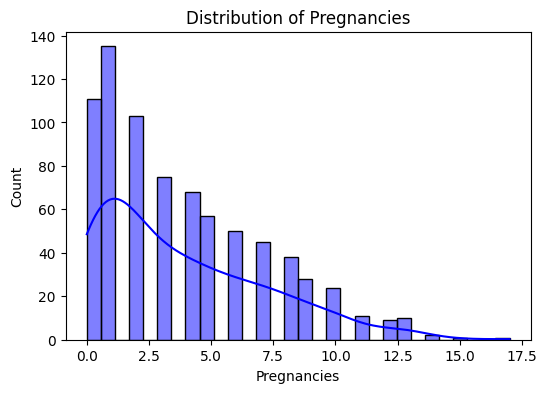

Glucose - skew: 0.17


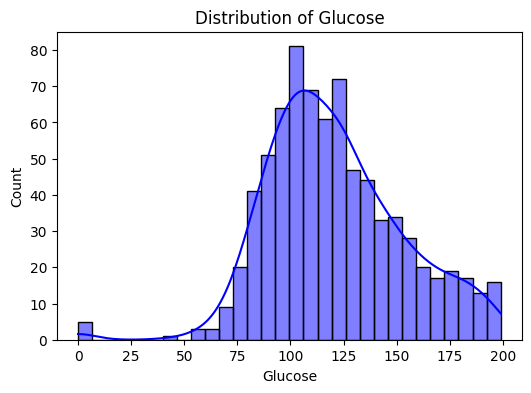

BloodPressure - skew: -1.84


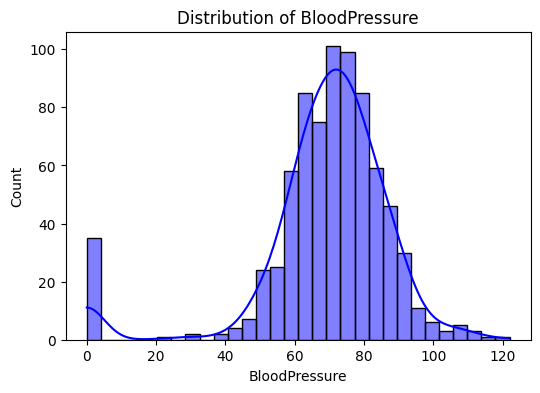

BMI - skew: -0.43


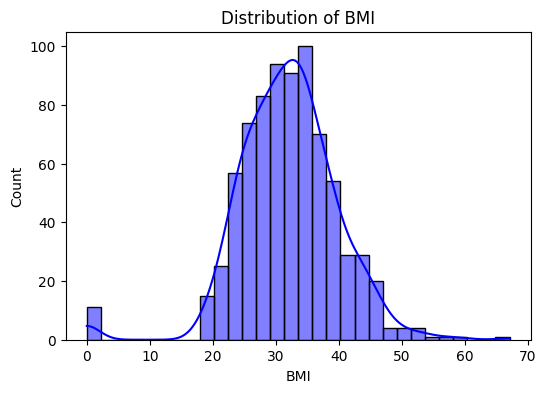

DiabetesPedigreeFunction - skew: 1.92


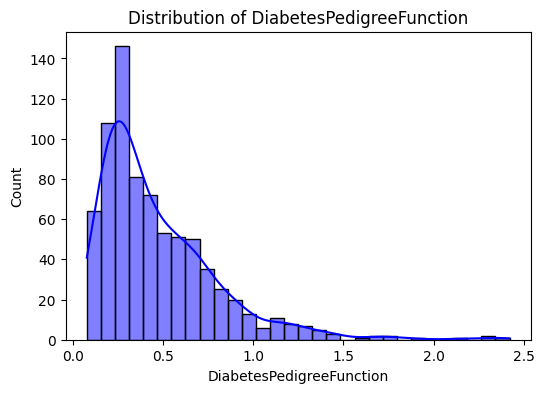

Age - skew: 1.13


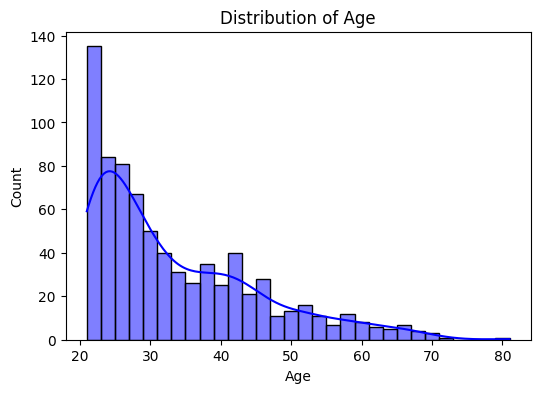

In [45]:
for col in features.columns:
    print(f"{col} - skew: {round(df[col].skew(), 2)}")
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df, x=df[col], kde=True, bins=30, color='blue')

    plt.title(f'Distribution of {col}')
    plt.show()

## Summary Statistics and Outlier Detection

We compute **descriptive statistics** for each feature to understand the central tendency, spread, and range of values.

### Key Metrics from `describe()`:
- **Count**: All features have 768 entries — no missing values.
- **Mean and Median**: Help understand feature centrality.
- **Standard Deviation**: Indicates variability.
- **Min/Max and Quartiles (25%, 50%, 75%)**: Help detect the presence of outliers and range of clinical values.

For example:
- `Glucose` ranges from **0 to 199**, with a mean of ~121.
- `BMI` also shows suspiciously low values (including **0**), which may suggest **missing or incorrect measurements**.
- `Age` spans from **21 to 81**, with most patients in their **30s to 40s**.

---

### Boxplot Analysis

We further visualize selected continuous variables (`Glucose`, `BloodPressure`, `BMI`, `Age`) using a **boxplot** to:
- Identify **outliers** beyond the whiskers (i.e., values outside 1.5×IQR).
- Understand **data symmetry and spread** visually.

#### Observations:
- **Glucose** and **BMI** have outliers at the high end.
- **BloodPressure** shows suspiciously low values (0 mmHg), which are likely **invalid clinically**.
- **Age** appears skewed with a wider spread toward older patients.

These insights will help guide preprocessing decisions (e.g., whether to cap or treat zero values, normalize skewed distributions, etc.) before model training.

       Pregnancies     Glucose  BloodPressure         BMI  \
count   768.000000  768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469   31.992578   
std       3.369578   31.972618      19.355807    7.884160   
min       0.000000    0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000   27.300000   
50%       3.000000  117.000000      72.000000   32.000000   
75%       6.000000  140.250000      80.000000   36.600000   
max      17.000000  199.000000     122.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                768.000000  768.000000  
mean                   0.471876   33.240885  
std                    0.331329   11.760232  
min                    0.078000   21.000000  
25%                    0.243750   24.000000  
50%                    0.372500   29.000000  
75%                    0.626250   41.000000  
max                    2.420000   81.000000  


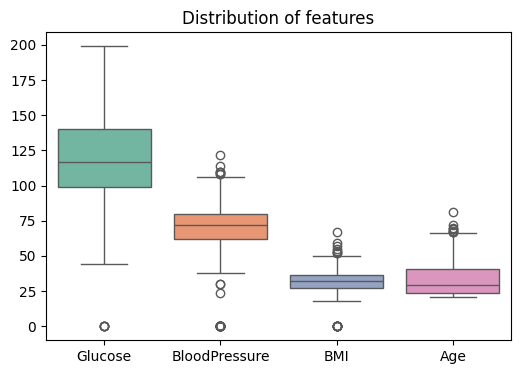

In [52]:
print(features.describe())

plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'BMI', 'Age']], palette='Set2')

plt.title(f'Distribution of features')
plt.show()

## Outcome-Based Feature Distribution (Boxplot Summary)

To explore how each feature varies across the target classes (`Outcome`), we compute **summary statistics** (25th percentile, median, and 75th percentile) grouped by diabetes outcome and visualize the distributions using boxplots.

This analysis helps us:
- Identify which features are most **discriminative** between diabetic (`1`) and non-diabetic (`0`) patients.
- Understand **directional trends** — whether feature values tend to be higher or lower for diabetic individuals.
- Inform **feature importance intuition** before modeling.

### Summary of Observations:

| Feature                   | Trend in Diabetics (Outcome = 1)                       |
|---------------------------|--------------------------------------------------------|
| **Pregnancies**           | Higher median (4 vs 2) and broader upper quartile (8)  |
| **Glucose**               | Significantly higher median (140 vs 107)               |
| **BloodPressure**         | Slightly higher in diabetics, but less separation      |
| **BMI**                   | Clearly higher (median 34.25 vs 30.05)                 |
| **DiabetesPedigreeFunction** | More skewed and higher median (0.45 vs 0.34)     |
| **Age**                   | Diabetics tend to be older (median 36 vs 27)           |

These patterns suggest that features like **Glucose, BMI, Age, and Pregnancies** are likely to be **strong predictors** of diabetes — which will be validated during model training.

This step is crucial for developing intuition about the data and grounding machine learning decisions in interpretable statistics.

Outcome Summary by Pregnancies (Boxplot Quartiles):

         25% (Q1)  50% (Median)  75% (Q3)
Outcome                                  
0            1.00           2.0       5.0
1            1.75           4.0       8.0


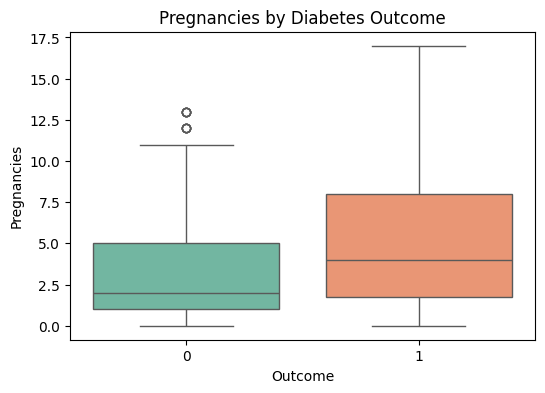

Outcome Summary by Glucose (Boxplot Quartiles):

         25% (Q1)  50% (Median)  75% (Q3)
Outcome                                  
0            93.0         107.0     125.0
1           119.0         140.0     167.0


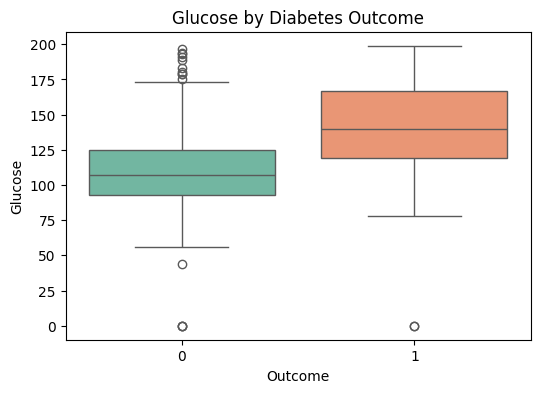

Outcome Summary by BloodPressure (Boxplot Quartiles):

         25% (Q1)  50% (Median)  75% (Q3)
Outcome                                  
0            62.0          70.0      78.0
1            66.0          74.0      82.0


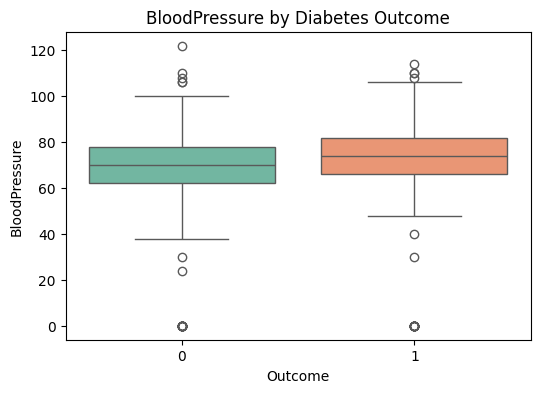

Outcome Summary by BMI (Boxplot Quartiles):

         25% (Q1)  50% (Median)  75% (Q3)
Outcome                                  
0            25.4         30.05     35.30
1            30.8         34.25     38.78


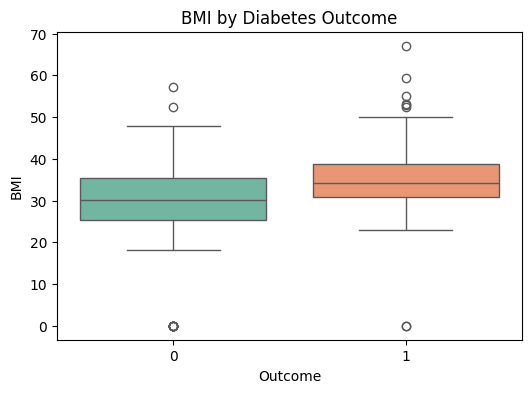

Outcome Summary by DiabetesPedigreeFunction (Boxplot Quartiles):

         25% (Q1)  50% (Median)  75% (Q3)
Outcome                                  
0            0.23          0.34      0.56
1            0.26          0.45      0.73


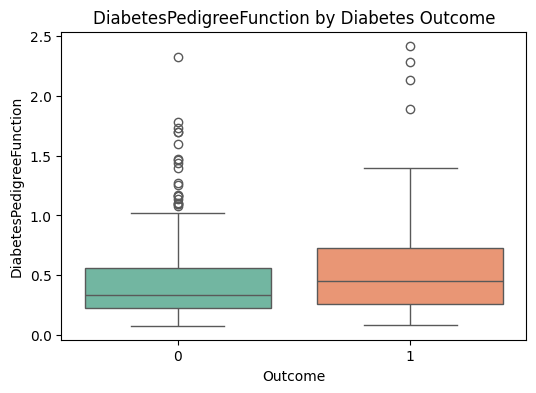

Outcome Summary by Age (Boxplot Quartiles):

         25% (Q1)  50% (Median)  75% (Q3)
Outcome                                  
0            23.0          27.0      37.0
1            28.0          36.0      44.0


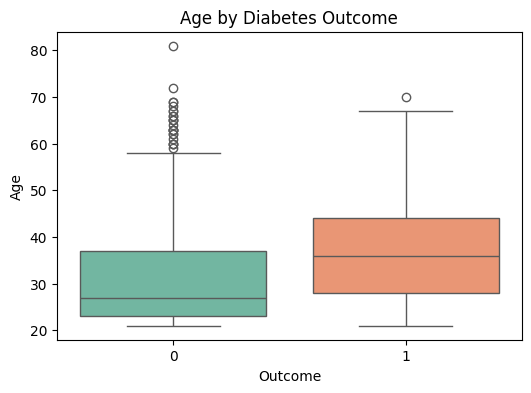

In [54]:
for col in features.columns:

    summary_stats = df.groupby('Outcome')[col].quantile([0.25, 0.5, 0.75]).unstack()

    # Rename columns for clarity
    summary_stats.columns = ['25% (Q1)', '50% (Median)', '75% (Q3)']
    summary_stats = summary_stats.round(2)

    # Print the summary stats
    print(f"Outcome Summary by {col} (Boxplot Quartiles):\n")
    print(summary_stats)

    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Diabetes Outcome')
    plt.show()

## Feature Engineering and Data Preprocessing

Before training predictive models, we prepare the data through **splitting** and **scaling** — two critical steps to ensure valid training and fair evaluation.

### Train-Test Split
We divide the dataset into:
- **Training set (80%)**: Used to train the model.
- **Testing set (20%)**: Held out for evaluating model performance.

We use `train_test_split()` with a fixed `random_state` to ensure **reproducibility**.

### Feature Scaling (Standardization)
Many machine learning algorithms — especially those that rely on distance or gradient descent — perform better when features are on a similar scale.

We apply **standardization** using `StandardScaler`:
- Subtracts the mean and divides by the standard deviation.
- Transforms all features to have **zero mean and unit variance**.

We fit the scaler only on the **training set**, then apply it to both training and test data to avoid **data leakage**.

This preprocessing ensures that features contribute equally to the model and prepares the data for optimal performance in both linear and tree-based models.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Unsupervised Mining

## Clustering with K-Means: Elbow Method for Optimal k

In addition to supervised learning, we briefly explore **unsupervised learning** through clustering to identify natural groupings within the dataset. This can help reveal latent patterns (e.g., subpopulations of patients) that may not be immediately visible.

### Step 1: Elbow Method
We apply the **Elbow Method** to determine the optimal number of clusters `k` for K-Means:
- K-Means is run for `k` values ranging from 1 to 10.
- For each `k`, we compute the **inertia** (sum of squared distances from each point to its assigned cluster center).
- We then plot `k` versus inertia.

### Interpretation:
- The plot shows a **sharp decrease in inertia up to k=3**, after which the rate of improvement slows down.
- This “elbow” point suggests that **k=3** is a suitable number of clusters, offering a balance between **compact clusters** and **model simplicity**.

> Note: Although our main goal is predictive modeling, this clustering can provide clinical insight — for instance, grouping patients into low, moderate, and high-risk diabetes profiles based on patterns in their features.


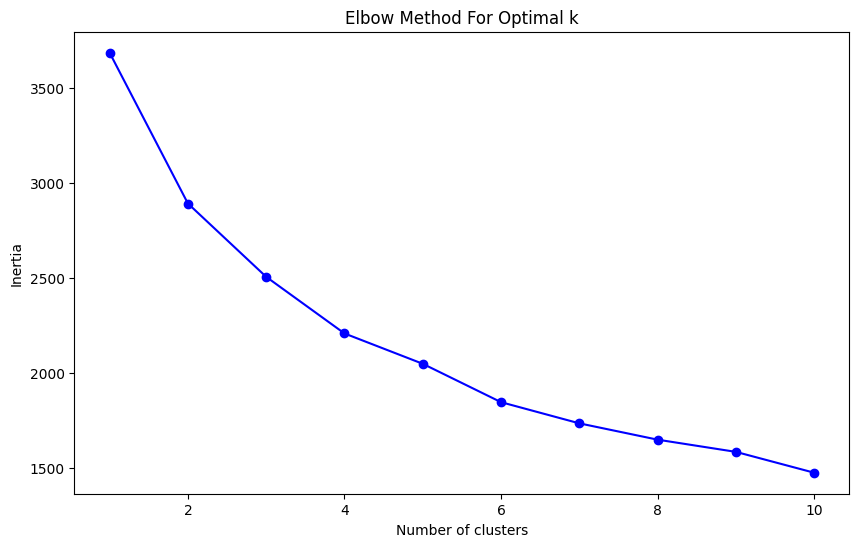

In [19]:
# 1. Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## K-Means Clustering and PCA-Based Visualization

After determining the optimal number of clusters (`k=3`) using the Elbow Method, we proceed to apply **K-Means clustering** and visualize the results in 2D space using **Principal Component Analysis (PCA)**.

### Step 2: Apply K-Means Clustering
- We fit KMeans with `n_clusters=3` on the **scaled training data**.
- The model assigns each patient in the training set to one of three **unsupervised clusters** based on feature similarity.
- These clusters can suggest subgroups with shared clinical profiles.

### Step 3: Dimensionality Reduction with PCA
- We use **PCA (Principal Component Analysis)** to reduce the high-dimensional data (6 features) into **2 principal components**.
- PCA finds the directions (components) of **maximum variance**, making it ideal for visualizing complex patterns.

### Cluster Visualization
- A scatterplot of the first two principal components shows the **three distinct clusters**:
  - **Blue cluster** appears on the **far left**, indicating a subgroup with clearly different characteristics.
  - **Green cluster** takes over near the middle and continues **rightward**, capturing the central distribution of patients.
  - **Red cluster** sits mostly **above the transition point** between blue and green, scattered and slightly overlapping — potentially a **transitional or mixed-risk group**.

> This visualization supports the idea that there may be **hidden patient segments** in the clinical data, even without using the labels (`Outcome`). These insights could inspire further investigations or tailored clinical strategies.

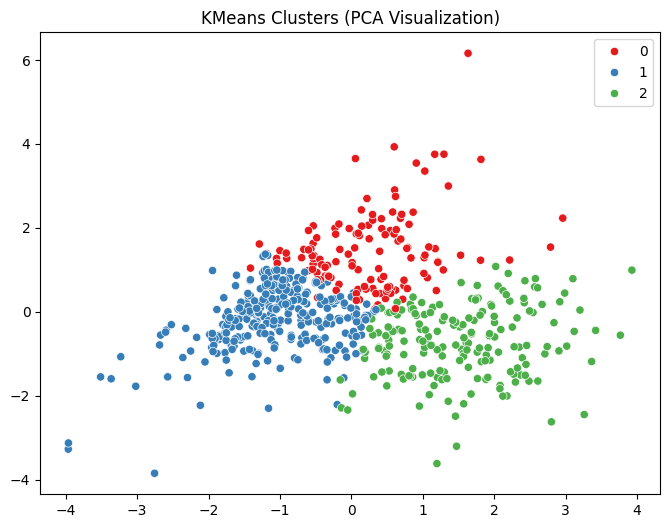

In [20]:
# 2. Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# 3. Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set1')
plt.title('KMeans Clusters (PCA Visualization)')
plt.show()

## Association Rule Mining: Clinical Pattern Discovery

To complement our predictive modeling, we apply **Association Rule Mining** to discover patterns and relationships in the clinical data that are **intuitively explainable**.

This unsupervised data mining technique helps uncover rules like:
> “If a patient has high glucose and is overweight, then they are likely to be diabetic.”

We follow a structured pipeline using the **Apriori algorithm**:

---

### Step-by-Step Process

#### 1. **Data Preparation**
- The cleaned dataset is copied and discretized into categorical bins (e.g., `Glucose: Low, Normal, High`, `Age: Young, Middle-aged, Senior`).
- The `Outcome` column is converted to readable labels (`Diabetes` / `No Diabetes`).

#### 2. **One-Hot Encoding**
- We use `pd.get_dummies()` to convert categorical variables into binary format suitable for Apriori.
- All features are ensured to be binary (`0` or `1`) for compatibility.

#### 3. **Apply Apriori Algorithm**
- We extract **frequent itemsets** with `min_support = 0.1`.
- These itemsets form the basis for generating meaningful rules.

#### 4. **Generate Association Rules**
- We use the `lift` metric (with `min_threshold = 1`) to find high-confidence, non-random rules.
- Rules are filtered to show only those where `Outcome` appears in the **consequent**, making them directly interpretable.

---

### Top Rules Leading to Diabetes

| Antecedents                                 | Confidence | Lift |
|---------------------------------------------|------------|------|
| High Glucose + Overweight BMI               | 70.0%      | 2.01 |
| High Glucose                                 | 68.8%      | 1.97 |
| Middle-aged + Overweight BMI                | 53.0%      | 1.52 |
| High Pregnancies + Overweight BMI           | 53.0%      | 1.52 |
| Middle-aged                                  | 52.4%      | 1.50 |

These rules suggest that **high glucose** and **being overweight** are strong indicators of diabetes risk — aligning well with medical knowledge.


### Top Rules Leading to No Diabetes

| Antecedents                                                      | Confidence | Lift |
|------------------------------------------------------------------|------------|------|
| Young Age + Low Glucose + Low Pedigree                           | 96.7%      | 1.49 |
| Young Age + Low Glucose + Low Pregnancies                        | 95.4%      | 1.47 |
| Low Glucose + Low Pregnancies                                    | 94.8%      | 1.46 |
| Low Pedigree + Low Glucose                                       | 94.8%      | 1.46 |
| Young Age + Low Glucose + Low Blood Pressure                     | 94.3%      | 1.45 |

These rules highlight a **low-risk group**: young individuals with low glucose levels and simple health profiles are highly unlikely to have diabetes.

---

### 📌 Why This Matters
- Unlike black-box models, association rules provide **transparent, explainable logic** that aligns with clinical reasoning.
- These patterns can inform doctors, patients, or health policy — especially where model deployment is limited.

In [65]:
# 1. Copy the cleaned dataset
df_ar = df.copy()

# 2. Discretize each feature into bins
df_ar['Pregnancies'] = pd.cut(df_ar['Pregnancies'], bins=[-1, 2, 5, 17], labels=['Low', 'Medium', 'High'])
df_ar['Glucose'] = pd.cut(df_ar['Glucose'], bins=[0, 100, 140, 200], labels=['Low', 'Normal', 'High'])
df_ar['BloodPressure'] = pd.cut(df_ar['BloodPressure'], bins=[0, 70, 90, 122], labels=['Low', 'Normal', 'High'])
df_ar['BMI'] = pd.cut(df_ar['BMI'], bins=[0, 18.5, 25, 40], labels=['Underweight', 'Normal', 'Overweight'])
df_ar['DiabetesPedigreeFunction'] = pd.cut(df_ar['DiabetesPedigreeFunction'], bins=[0, 0.4, 0.8, 2.5], labels=['Low', 'Medium', 'High'])
df_ar['Age'] = pd.cut(df_ar['Age'], bins=[20, 35, 50, 81], labels=['Young', 'Middle-aged', 'Senior'])

df_ar['Outcome'] = df_ar['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

# 3. One-hot encode
df_ohe = pd.get_dummies(df_ar)

# 4. Ensure values are binary (0 or 1)
df_ohe = df_ohe.applymap(lambda x: 1 if x >= 1 else 0)

# 5. Apply Apriori
frequent_items = apriori(df_ohe, min_support=0.1, use_colnames=True)

# 6. Generate Rules
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

# Filter rules with Outcome in CONSEQUENT only (not in antecedent)
def is_valid_rule(rule_row, outcome_label):
    antecedents = set(rule_row['antecedents'])
    consequents = set(rule_row['consequents'])
    return (
        any(outcome_label in str(c) for c in consequents) and
        all('Outcome' not in str(a) for a in antecedents)
    )

# 7. Apply filtering for both classes
diabetes_rules = rules[rules['consequents'] == frozenset({'Outcome_Diabetes'})]
no_diabetes_rules = rules[rules['consequents'] == frozenset({'Outcome_No Diabetes'})]

# Columns to display
columns_to_display = ['antecedents', 'consequents', 'support', 'confidence', 'lift']

# Round metrics to 3 decimal places
diabetes_rules[columns_to_display] = diabetes_rules[columns_to_display].round(3)
no_diabetes_rules[columns_to_display] = no_diabetes_rules[columns_to_display].round(3)

C:\Users\USER\AppData\Local\Temp\ipykernel_13596\3057973285.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_rules[columns_to_display] = diabetes_rules[columns_to_display].round(3)
C:\Users\USER\AppData\Local\Temp\ipykernel_13596\3057973285.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_diabetes_rules[columns_to_display] = no_diabetes_rules[columns_to_display].round(3)


In [66]:

# Display top 5 rules leading to Diabetes
print("Top Rules Leading to Diabetes:")
diabetes_rules[columns_to_display].sort_values(by='lift', ascending=False).head(5)

Top Rules Leading to Diabetes:


,antecedents,consequents,support,confidence,lift
366,"(Glucose_High, BMI_Overweight)",(Outcome_Diabetes),0.128,0.700,2.006
48,(Glucose_High),(Outcome_Diabetes),0.172,0.688,1.970
468,"(Age_Middle-aged, BMI_Overweight)",(Outcome_Diabetes),0.103,0.530,1.519
252,"(Pregnancies_High, BMI_Overweight)",(Outcome_Diabetes),0.115,0.530,1.519
88,(Age_Middle-aged),(Outcome_Diabetes),0.129,0.524,1.501


In [67]:
# Display top rules leading to No Diabetes
print("\nTop Rules Leading to No Diabetes:")
no_diabetes_rules[columns_to_display].sort_values(by='lift', ascending=False).head(5)


Top Rules Leading to No Diabetes:


,antecedents,consequents,support,confidence,lift
698,"(Age_Young, DiabetesPedigreeFunction_Low, Gluc...",(Outcome_No Diabetes),0.115,0.967,1.485
487,"(Age_Young, Glucose_Low, Pregnancies_Low)",(Outcome_No Diabetes),0.135,0.954,1.466
103,"(Glucose_Low, Pregnancies_Low)",(Outcome_No Diabetes),0.143,0.948,1.457
290,"(DiabetesPedigreeFunction_Low, Glucose_Low)",(Outcome_No Diabetes),0.142,0.948,1.456
672,"(Age_Young, Glucose_Low, BloodPressure_Low)",(Outcome_No Diabetes),0.129,0.943,1.448


## Model Evaluation and Comparison

To identify the best predictive model for diabetes classification, we trained and evaluated several machine learning algorithms using the following metrics:

- **Accuracy**: Overall correctness of the model.
- **Precision**: Correct positive predictions out of all predicted positives.
- **Recall (Sensitivity)**: Correct positive predictions out of all actual positives — critical in medical diagnosis.
- **F1 Score**: Harmonic mean of precision and recall, especially useful with imbalanced data.
- **ROC-AUC Score**: Probability that the model ranks a randomly chosen positive instance higher than a negative one.

Given the **target class imbalance** (34.9% positive), we emphasize **recall** and **F1 score** alongside overall accuracy.



### Performance Summary

| Model                | Accuracy | Precision | Recall | F1 Score | ROC-AUC |
|----------------------|----------|-----------|--------|----------|---------|
| Logistic Regression  | 76%      | 66%       | 67%    | 67%      | 0.74    |
| Decision Tree        | 76%      | 68%       | 62%    | 65%      | 0.73    |
| **Random Forest**    | **78%**  | **68%**   | **71%**| **70%**  | **0.76**|
| Gradient Boosting    | 73%      | 61%       | 67%    | 64%      | 0.72    |
| XGBoost              | 76%      | 65%       | 71%    | 68%      | 0.75    |



###  Insights:
- **Random Forest** outperforms other models across most metrics, especially F1 Score and ROC-AUC, making it the **best overall performer**.
- **XGBoost** achieves the highest recall, indicating better sensitivity to diabetic cases, which is critical in a clinical setting.
- **Logistic Regression** offers solid performance as a simple baseline model, with balanced precision and recall.
- **Gradient Boosting** performs slightly lower than others, potentially due to its higher sensitivity to parameter tuning or data size.

>  **Conclusion**: Random Forest provides the most reliable performance for this dataset and use case, but XGBoost is a close contender with slightly better recall.

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# Model Evaluation

y_pred = logistic_regression.predict(X_test_scaled) 

accuracy = round(accuracy_score(y_test, y_pred) * 100)
precision = round(precision_score(y_test, y_pred) * 100)
recall = round(recall_score(y_test, y_pred) * 100)
f1 = round(f1_score(y_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 76
Precision:  66
Recall:  67
f1 Score:  67
ROC-AUC Score:  74


In [26]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=10)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100)
precision = round(precision_score(y_test, y_pred) * 100)
recall = round(recall_score(y_test, y_pred) * 100)
f1 = round(f1_score(y_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 76
Precision:  68
Recall:  62
f1 Score:  65
ROC-AUC Score:  73


In [27]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=10)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100)
precision = round(precision_score(y_test, y_pred) * 100)
recall = round(recall_score(y_test, y_pred) * 100)
f1 = round(f1_score(y_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 78
Precision:  68
Recall:  71
f1 Score:  70
ROC-AUC Score:  76


In [28]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100,
                                               learning_rate=0.1, 
                                               max_depth=3, 
                                               random_state=10)
gradient_boosting.fit(X_train, y_train)

y_pred = gradient_boosting.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100)
precision = round(precision_score(y_test, y_pred) * 100)
recall = round(recall_score(y_test, y_pred) * 100)
f1 = round(f1_score(y_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 73
Precision:  61
Recall:  67
f1 Score:  64
ROC-AUC Score:  72


In [29]:
xg_boost = XGBClassifier(n_estimators=100,
                        learning_rate=0.1, 
                        max_depth=3, 
                        random_state=10)
xg_boost.fit(X_train, y_train)

y_pred = xg_boost.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100)
precision = round(precision_score(y_test, y_pred) * 100)
recall = round(recall_score(y_test, y_pred) * 100)
f1 = round(f1_score(y_test, y_pred) * 100)
roc_auc = round(roc_auc_score(y_test, y_pred) * 100)

print(f"Accuracy: {accuracy}")
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 Score: ", f1)
print("ROC-AUC Score: ", roc_auc)

Accuracy: 76
Precision:  65
Recall:  71
f1 Score:  68
ROC-AUC Score:  75


## Confusion Matrix: Random Forest Model

To evaluate the classification performance in a **clinically interpretable** way, we examine the **confusion matrix** of the Random Forest model on the test data.

### Confusion Matrix Breakdown

| Actual \ Predicted | Negative (0) | Positive (1) |
|--------------------|--------------|--------------|
| **Negative (0)**   | 81 (TN)      | 18 (FP)      |
| **Positive (1)**   | 16 (FN)      | 39 (TP)      |

- **True Negatives (TN):** 81 patients correctly predicted as non-diabetic.
- **False Positives (FP):** 18 patients incorrectly predicted as diabetic.
- **False Negatives (FN):** 16 diabetic patients missed by the model.
- **True Positives (TP):** 39 diabetic patients correctly identified.

---

### Interpretation:

- The model **missed 16 actual diabetics** (False Negatives), which is critical in clinical contexts — but overall, the number of **correct positives (39)** is strong.
- **False Positives (18)** represent patients wrongly flagged as diabetic, which may lead to unnecessary tests but is less risky than false negatives.
- The confusion matrix supports previous metrics (Recall: 71%, Precision: 68%) and confirms the model’s balanced performance.

> This evaluation is especially important in healthcare, where the cost of false negatives (undiagnosed conditions) can be high.

Confusion Matrix
[[81 18]
 [16 39]]


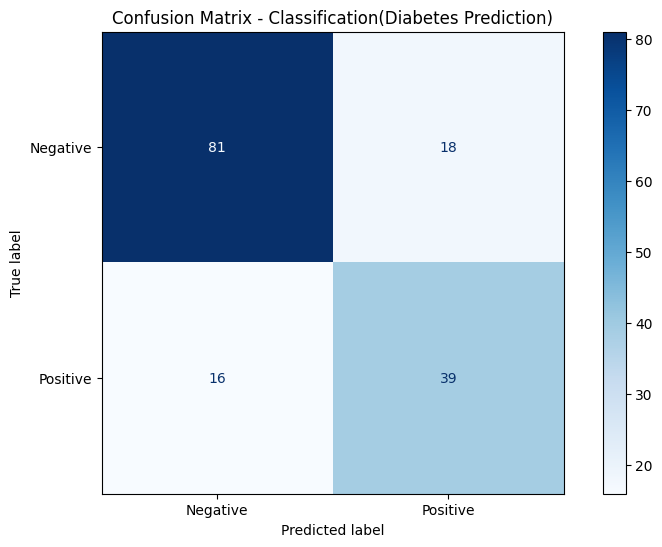

In [69]:
y_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Classification(Diabetes Prediction)")
plt.show()

## Mini Prototype: Real-Time Prediction from User Input

To demonstrate the practical application of our predictive model, we created a **simple interactive prototype** that accepts clinical input from a user and returns a diabetes prediction.

### How It Works:
- The user provides 6 essential clinical parameters:
  - **Pregnancies**
  - **Glucose**
  - **Blood Pressure**
  - **BMI**
  - **Diabetes Pedigree Function**
  - **Age**

- These inputs are structured into a DataFrame and passed into the **trained Random Forest model** to make a prediction.

> This prototype shows how the model can support clinical decision-making in a practical, accessible format.


In [32]:
Pregnancies = int(input("How many time have you been pregnant? (Enter 0 if not applicable): "))
Glucose = int(input("What is your glucose level? (e.g., 120): "))
BloodPressure = int(input("What is your diastolic blood pressure? (e.g., 80): "))
BMI = float(input("What is your Body Mass Index (BMI)? (e.g., 28.7): "))
DiabetesPedigreeFunction = float(input("What is your Diabetes Pedigree Function value? (e.g., 0.5): "))
Age = int(input("What is your age? (e.g., 35): "))

new_patient = pd.DataFrame({
    'Pregnancies': [Pregnancies],
    'Glucose': [Glucose],
    'BloodPressure': [BloodPressure],
    'BMI': [BMI],
    'DiabetesPedigreeFunction': [DiabetesPedigreeFunction],
    'Age': [Age]
})

prediction = random_forest.predict(new_patient)

print("\nSummary of Entered Data:")
print(new_patient)
print("\nPrediction Results:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


Summary of Entered Data:
   Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age
0            0      143             87  54.0                      0.76   24

Prediction Results: Not Diabetic


## Model Deployment: Streamlit Web Application

To make the predictive model accessible to end users — such as clinicians, patients, or researchers — we deployed it using **Streamlit**, a lightweight Python framework for building interactive web applications.

### Application Overview

The web interface allows users to input clinical features, and it instantly predicts the likelihood of diabetes using the trained `RandomForestClassifier`.

In [33]:
joblib.dump(random_forest, 'diabetes_model.pkl')

['diabetes_model.pkl']